In [ ]:
# ARIMA and Seasonal ARIMA models
# Auto Regressive Integrated Moving averages and Auto Regressive Integrated Moving Averages Seasonal 

In [22]:
import pandas as pd
df = pd.read_csv('Perrin Freres monthly champagne sales millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [23]:
# Rename second column as SALES
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [24]:
#Check if any null value is there
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [28]:
df.dropna(inplace=True)
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [29]:
#Check if any null value is there
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [33]:
df['Month']=pd.to_datetime(df['Month'])
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [41]:
df = df.set_index('Month')
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [44]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# PLOT

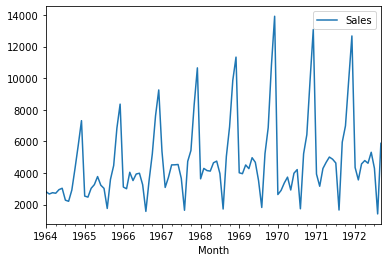

In [45]:
df.plot()

# TSA

In [51]:
import pandas as pd
import numpy as np
date = [pd.Timestamp('2020-02-02'),pd.Timestamp('2020-02-01')]
timeSeries = pd.Series(np.random.rand(len(date)),index=date)
timeSeries

2020-02-02    0.205709
2020-02-01    0.270157
dtype: float64

In [52]:
timeSeries['2020-02-02']

2020-02-02    0.205709
dtype: float64

#### DATE RANGE IN PANDAS

In [53]:
pd.date_range(start='2020-11-01',end='2020-11-20',freq='B')

DatetimeIndex(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', freq='B')

In [61]:
pd.date_range(start='2020-12-01',periods=3,freq='1H2t10s')

DatetimeIndex(['2020-12-04', '2020-12-11', '2020-12-18'], dtype='datetime64[ns]', freq='W-FRI')

In [66]:
pd.date_range(start='2020-10-01',periods=6,freq='W-TUE')

DatetimeIndex(['2020-10-06', '2020-10-13', '2020-10-20', '2020-10-27',
               '2020-11-03', '2020-11-10'],
              dtype='datetime64[ns]', freq='W-TUE')

### TS _ SAMPLING

In [144]:
import numpy as np
import pandas as pd
customerArrival = pd.date_range('18/09/2017 8:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0, 100, len(customerArrival)), index=customerArrival)
custArrivalTs.head(10)

2017-09-18 08:00:00    72
2017-09-18 08:01:00    71
2017-09-18 08:02:00     1
2017-09-18 08:03:00    61
2017-09-18 08:04:00    81
2017-09-18 08:05:00    77
2017-09-18 08:06:00    71
2017-09-18 08:07:00    52
2017-09-18 08:08:00    42
2017-09-18 08:09:00    36
Freq: T, dtype: int64

In [145]:
custArrivalTs = custArrivalTs.resample("10min").mean()
#interpolate() for upscaling
custArrivalTs.head()

2017-09-18 08:00:00    56.4
2017-09-18 08:10:00    33.4
2017-09-18 08:20:00    53.7
2017-09-18 08:30:00    43.4
2017-09-18 08:40:00    48.4
Freq: 10T, dtype: float64

In [150]:
custArrivalTs.resample('1h').max()

2017-09-18 08:00:00    56.4
2017-09-18 09:00:00    58.9
2017-09-18 10:00:00    57.2
2017-09-18 11:00:00    70.2
2017-09-18 12:00:00    65.7
2017-09-18 13:00:00    57.9
2017-09-18 14:00:00    63.9
2017-09-18 15:00:00    65.2
2017-09-18 16:00:00    61.8
2017-09-18 17:00:00    60.0
Freq: H, dtype: float64

In [152]:
custArrivalTs.resample('1h').ohlc()

,open,high,low,close
2017-09-18 08:00:00,56.4,56.4,33.4,55.4
2017-09-18 09:00:00,49.5,58.9,45.9,49.4
2017-09-18 10:00:00,52.7,57.2,38.2,44.7
2017-09-18 11:00:00,41.1,70.2,41.1,53.5
2017-09-18 12:00:00,48.4,65.7,48.2,48.2
2017-09-18 13:00:00,45.7,57.9,44.6,54.5
2017-09-18 14:00:00,61.3,63.9,48.6,59.0
2017-09-18 15:00:00,41.9,65.2,24.5,46.3
2017-09-18 16:00:00,56.8,61.8,38.3,38.3
2017-09-18 17:00:00,60.0,60.0,44.3,59.2


In [154]:
sampleRng = pd.date_range('9/18/2017 8:00', periods=10, freq='H')
sampleRng

DatetimeIndex(['2017-09-18 08:00:00', '2017-09-18 09:00:00',
               '2017-09-18 10:00:00', '2017-09-18 11:00:00',
               '2017-09-18 12:00:00', '2017-09-18 13:00:00',
               '2017-09-18 14:00:00', '2017-09-18 15:00:00',
               '2017-09-18 16:00:00', '2017-09-18 17:00:00'],
              dtype='datetime64[ns]', freq='H')

In [157]:
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
sampleTs

2017-09-18 08:00:00    20
2017-09-18 09:00:00    38
2017-09-18 10:00:00    30
2017-09-18 11:00:00    16
2017-09-18 12:00:00    50
2017-09-18 13:00:00    93
2017-09-18 14:00:00    31
2017-09-18 15:00:00    82
2017-09-18 16:00:00    11
2017-09-18 17:00:00    88
Freq: H, dtype: int64

In [171]:
sampleTs.resample('15min').bfill().head()

2017-09-18 08:00:00    20
2017-09-18 08:15:00    38
2017-09-18 08:30:00    38
2017-09-18 08:45:00    38
2017-09-18 09:00:00    38
Freq: 15T, dtype: int64

In [1]:
# INTERPOLATION is filling missing value based on data pattern

In [173]:
sampleTs.resample('15min').interpolate().head()

2017-09-18 08:00:00    20.0
2017-09-18 08:15:00    24.5
2017-09-18 08:30:00    29.0
2017-09-18 08:45:00    33.5
2017-09-18 09:00:00    38.0
Freq: 15T, dtype: float64

In [179]:
# How many observations have you seen from Jan 1, 2011 to March 31, 2011?
assignDates = pd.date_range('Jan 1, 2011','March 31, 2011',freq='W')
len(assignDates)

13

In [180]:
assignDates

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27'],
              dtype='datetime64[ns]', freq='W-SUN')

### TIMEZONE

In [192]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [203]:
asiaTime = pytz.timezone('Asia/Kolkata')
asiaTime

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

In [204]:
import pandas as pd 
import random 
timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq='D',tz='UTC')
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
timeZoneTs.index.tz

<UTC>

In [215]:
np.random.randn(len(timeZoneRng))

array([ 1.78970254,  0.21482016,  0.02442065,  0.79447773,  1.1423398 ,
       -0.15137182])

In [218]:
timeZoneTs = timeZoneTs.tz_convert('US/Eastern')

In [219]:
timeZoneTs.index.tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [225]:
sampleTimeStamp =  pd.Timestamp('2011-09-19 04:00')
timeStamp_utc = sampleTimeStamp.tz_localize('Asia/Kolkata')
timeStamp_utc
# timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')
# timeStamp_utc

Timestamp('2011-09-19 04:00:00+0530', tz='Asia/Kolkata')

In [228]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [231]:
dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')

timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
# tz2 = tz1[2:].tz_convert('Asia/Seoul')
# combine = tz1 + tz2
# combine.index

2017-09-19 09:30:00    0.798354
2017-09-20 09:30:00   -0.298766
2017-09-21 09:30:00    1.317455
2017-09-22 09:30:00   -0.505519
2017-09-25 09:30:00    0.032487
2017-09-26 09:30:00   -0.490473
2017-09-27 09:30:00    2.068211
2017-09-28 09:30:00   -1.303523
2017-09-29 09:30:00    1.935921
2017-10-02 09:30:00   -0.602636
Freq: B, dtype: float64

In [1]:
import pandas as pd
import numpy as np 
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs.tail(20)

2025-05-01   -25
2025-06-01   -24
2025-07-01   -33
2025-08-01   -38
2025-09-01   -33
2025-10-01   -30
2025-11-01   -32
2025-12-01   -24
2026-01-01   -24
2026-02-01   -31
2026-03-01   -29
2026-04-01   -35
2026-05-01   -30
2026-06-01   -37
2026-07-01   -39
2026-08-01   -31
2026-09-01   -26
2026-10-01   -29
2026-11-01   -36
2026-12-01   -40
Freq: MS, dtype: int64

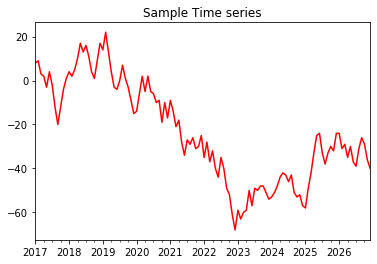

In [2]:
sampleTs.plot(color='r',title='Sample Time series',ls='-')

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2023-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2026-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 3A-DEC, dtype: object

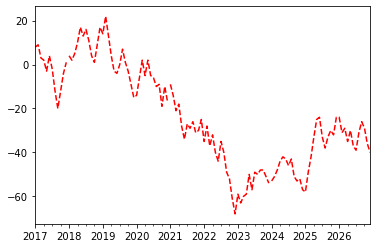

In [5]:
sampleTs.resample('3A').plot(c='r', ls='--')

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2022-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2027-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 5A-DEC, dtype: object

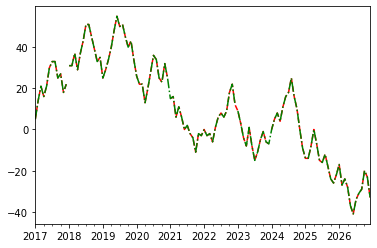

In [58]:
sampleTs.resample('3A').plot(c='r', ls='--')
sampleTs.resample('5A').plot(c='g', ls='-.')

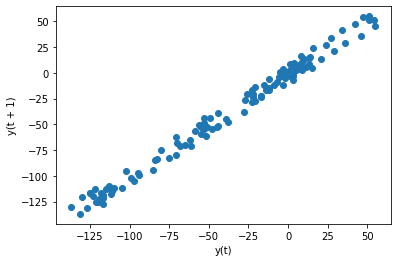

In [64]:
from pandas.plotting import lag_plot
lag_plot(sampleTs)

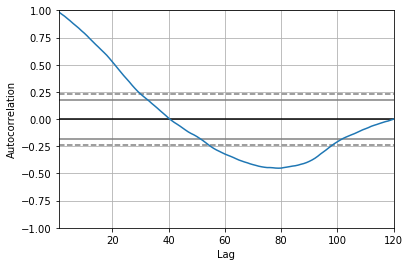

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)
# When the autocorrelation plot shows an exponential behavior, the time series is stationary.

In [67]:
# Augmented Dickey - Fuller test
#     Null Hypothesis: H0 - If accepted then the time series data is non-stationary, and it has a unit root.
#     Alternate Hypothesis: H1 - The null hypothesis is rejected. The time series data is stationary and does not have any unit root.
# Results
#     p-value > 0.05: Accept the (H0), the data is non-stationary and has a unit root

In [74]:
# from statsmodels.tsa.stattools import adfuller

# ADF Statistic: 
# p-value: 
# 	1%: 
# 	5%: 
# 	10%:
        
#         The more negative the ADF statistic value is the more likely 
#         the data is stationary.

In [18]:
import random 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
np.random.seed(0)
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()

In [20]:
tsResult = adfuller(sampleTs)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.626156
p-value: 0.864962
	1%: -3.487
	5%: -2.886
	10%: -2.580


In [ ]:


#     The ADF Statistic value is -1.328310. It is negative.

#     The p-value: 0.616123 and is greater than 0.05 so we accept the null hypothesis, 
#         which means the data is non-stationary.



In [31]:
dataFrame = pd.read_csv('dow_jones_index.data',parse_dates=["date"], index_col="date")

closeTS = dataFrame[(dataFrame.stock == 'AA')].close.str.replace('$',' ').astype(float)


In [32]:
dataFrame['open']=dataFrame['open'].map(lambda x: x[1:])
dataFrame['open']=dataFrame['high'].map(lambda x: x[1:])
dataFrame['open']=dataFrame['close'].map(lambda x: x[1:])
dataFrame

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-07,1,AA,16.42,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,1,AA,15.97,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,1,AA,15.79,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,1,AA,16.13,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,1,AA,17.14,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-27,2,XOM,82.63,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
2011-06-03,2,XOM,81.18,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
2011-06-10,2,XOM,79.78,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120


In [33]:
closeTS

date
2011-01-07    16.42
2011-01-14    15.97
2011-01-21    15.79
2011-01-28    16.13
2011-02-04    17.14
2011-02-11    17.37
2011-02-18    17.28
2011-02-25    16.68
2011-03-04    16.58
2011-03-11    16.03
2011-03-18    16.11
2011-03-25    17.09
2011-04-01    17.47
2011-04-08    17.92
2011-04-15    16.52
2011-04-21    16.97
2011-04-29    17.00
2011-05-06    17.15
2011-05-13    17.10
2011-05-20    16.26
2011-05-27    16.48
2011-06-03    15.92
2011-06-10    15.28
2011-06-17    14.72
2011-06-24    15.23
Name: close, dtype: float64

### SEASONAL DECOMPOSITION

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs, freq=12) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

<ipython-input-6-d0efdabed9b7>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sampleTs_decomp = seasonal_decompose(sampleTs, freq=12)


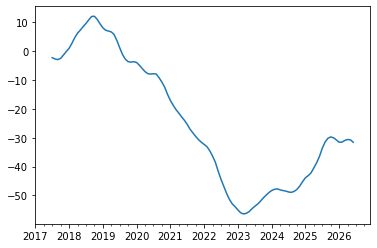

In [7]:
sampleTs_trend.plot()

<ipython-input-9-339a2ec471c5>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(sampleTs,freq=12).seasonal.plot()


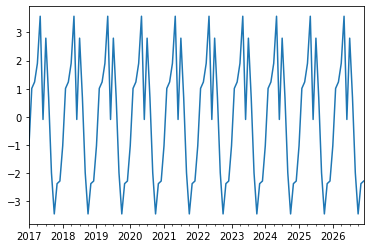

In [9]:
seasonal_decompose(sampleTs,freq=12).seasonal.plot()

In [10]:
# #Autoregression
# from statsmodels.tsa.arima_model import ARIMA 
# model = ARIMA(ts, order=(1, 1, 0)) 
# predValues = model.fit()

# #Moving Average
# model = ARIMA(ts, order=(0, 1, 1)) 

# movingAvgRes = model.fit() 




#     The first step is to visualize the time series.

#     The second step is to make the data stationary.

#      - This can be accomplished by 

#      - Detrending 

#      - Differencing

#      - Seasonality 

#     Getting the optimal parameters through Auto Correlation and Partial Auto Correlation

#     Build Model (AR , MA , ARMA , ARIMA) using the parameters

#     Make Predictions



In [ ]:
so learn about multivariate Time Series Modeling.


An ideal ACF(auto correlation function) plot will decay exponentially
-1 to 1



In [12]:
import pandas_datareader as pdr
appleData = pdr.get_data_yahoo('AAPL')

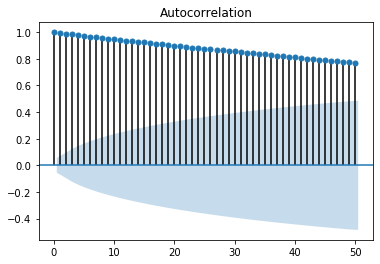

In [13]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(appleData.Close,lags=50)
pyplot.show()

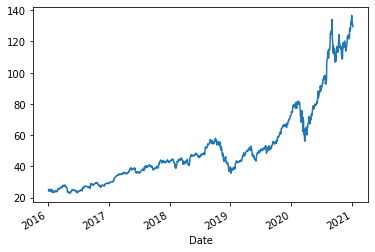

In [14]:
appleData['Close'].plot()

In [ ]:
PACF

The partial auto correlation at any given lag k is the correlation obtained after cancelling the effect of correlations due to terms at shorter lags.

In simple terms , in partial auto correlation , the effects due to intermediate terms are nullified to determine the correlation

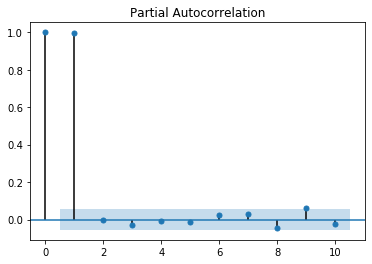

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(appleData.Close,lags=10)
pyplot.show()

In [ ]:
This process of regressing the past values to get the future values is known as Auto Regression
To be stationary all roots should lie outside the unit circle 1 ie. z>1


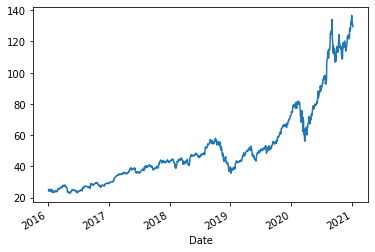

In [16]:
import pandas_datareader as pdr
appleData = pdr.get_data_yahoo('AAPL')
appleData.Close.plot()

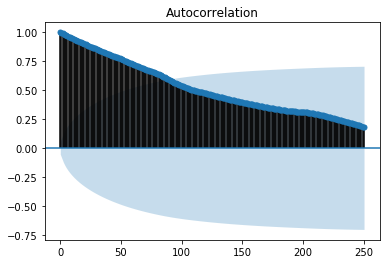

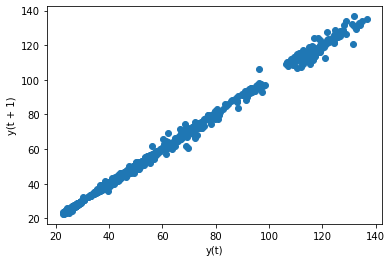

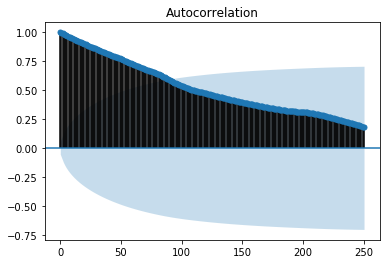

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = appleData.Close
train, test = X[1:len(X)-10], X[len(X)-10:]


from pandas.plotting import lag_plot

lag_plot(appleData.Close)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(appleData.Close,lags = 250)

In [18]:
# AUTO REGRESSIVE PROCESS
import pandas as pd
from pandas import Series
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
train, test = timeSeries[0:len(timeSeries)-10], timeSeries[len(timeSeries)-10:]


from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()


print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)


Lag: 11
Coefficients: [15.67536447  0.62458234 -0.45292916  0.34280524 -0.5546474   0.5341885
 -0.5704089   0.41405333 -0.49489097  0.38348228 -0.53257245  0.66382992]


/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [19]:
from sklearn.metrics import mean_squared_error
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

# Print values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=13.609278, expected=17.000000
predicted=19.904687, expected=21.000000
predicted=26.186465, expected=31.000000
predicted=34.491664, expected=34.000000
predicted=39.325427, expected=44.000000
predicted=28.142048, expected=38.000000
predicted=27.239483, expected=31.000000
predicted=25.730581, expected=30.000000
predicted=23.643683, expected=26.000000
predicted=27.749643, expected=32.000000
Test MSE: 21.113


### MOVING AVERAGES

In [25]:
import pandas_datareader as pdr
appleData = pdr.get_data_yahoo('AAPL')
from pandas import Series
seriesData = Series(appleData.Close.values)
rolling = seriesData.rolling(window=5)
rolling_mean = rolling.mean()
rolling_mean.head(10)

0        NaN
1        NaN
2        NaN
3        NaN
4    24.6300
5    24.4645
6    24.6180
7    24.6265
8    24.5330
9    24.3745
dtype: float64

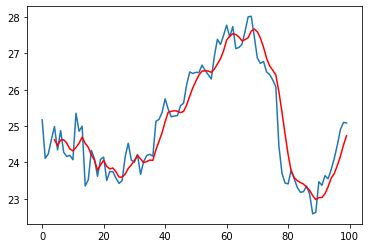

In [37]:
import matplotlib.pyplot as plt
seriesData.head(100).plot()
rolling_mean.head(100).plot(color='red')
plt.show()

In [66]:
from numpy import mean

X = appleData.Close.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test

for t in range(len(test)):
    length = len(history)

    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]

    predictions.append(yhat)

history.append(obs)

#	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)


Test MSE: 1430.481


In [51]:
X[:5]

array([25.17499924, 24.11249924, 24.23999977, 24.63249969, 24.98999977])

In [52]:
test[:2]

[24.63249969482422, 24.989999771118164]

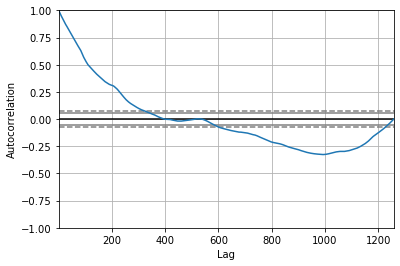

In [78]:

import pandas_datareader as pdr

from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
appleData = pdr.get_data_yahoo('AAPL')

appleCloseTs = appleData.Close

autocorrelation_plot(appleCloseTs)

plt.show()


/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2108.036
Date:                Wed, 06 Jan 2021   AIC                           4228.072
Time:                        08:39:21   BIC                           4258.891
Sample:                             0   HQIC                          4239.654
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1271      0.014     -8.889      0.000      -0.155      -0.099
ar.L2          0.0364      0.012      3.099      0.002       0.013       0.059
ar.L3         -0.0103      0.015     -0.683      0.4

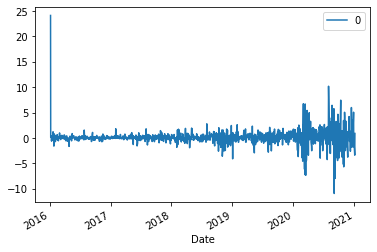

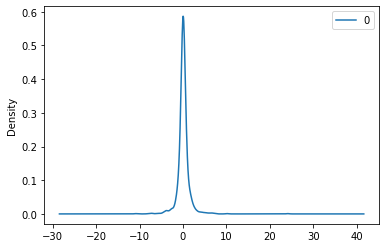

                 0
count  1258.000000
mean      0.108270
std       1.458218
min     -10.925243
25%      -0.265282
50%       0.054336
75%       0.456411
max      24.112499


In [82]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(appleCloseTs, order=(5,1,0))

model_fit = model.fit()

print(model_fit.summary())

# plot residual errors

residuals = DataFrame(model_fit.resid)

residuals.plot()

plt.show()

residuals.plot(kind='kde')

plt.show()

print(residuals.describe())

In [83]:

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

 

X = appleCloseTs.values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]

history = [x for x in train]

predictions = list()

for t in range(len(test)):

	model = ARIMA(history, order=(5,1,0))

	model_fit = model.fit(disp=0)

	output = model_fit.forecast()

	yhat = output[0]

	predictions.append(yhat)

	obs = test[t]

	history.append(obs)

	#print('predicted=%f, expected=%f' % (yhat, obs))


/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test MSE: 4.414


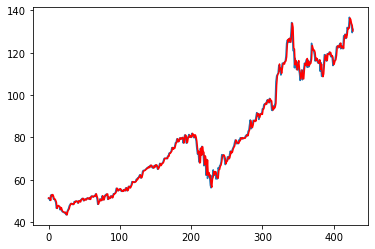

In [84]:

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot

plt.plot(test)

plt.plot(predictions, color='red')

plt.show()


In [85]:
# ARIMA MODEL
import pandas as pd
from pandas import Series
timeSeries  = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
ts = Series(timeSeries)
X = ts.values
# Import ARIMA from statsmodels
# Let the train test ratio be 4:1 (consider first 80% of data X for train set) . Accordingly set the size.
# Develop a forecasting model with ARIMA and initialise to variable model.
# Set the lag value to 5
# Set the degree of difference to 1
# Set unit moving average size to 0
# Fit the model and assign it to variable model_fit.
# Do the forecast with the model and assign the result to variable output.

###Start code here
from statsmodels.tsa.arima_model import ARIMA

X = X.astype('float64')

size = int(len(X) * 0.8)

train, test = X[0:size], X[size:len(X)]


history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
##End code
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=18.650693, expected=28.000000
predicted=24.901650, expected=22.000000
predicted=25.713328, expected=27.000000
predicted=29.598913, expected=18.000000
predicted=17.237799, expected=8.000000
predicted=8.439455, expected=17.000000
predicted=15.236531, expected=21.000000
predicted=24.254967, expected=31.000000
predicted=32.671336, expected=34.000000
predicted=30.706287, expected=44.000000
predicted=43.147270, expected=38.000000
predicted=35.767680, expected=31.000000
predicted=28.980102, expected=30.000000
predicted=27.519415, expected=26.000000
predicted=28.166803, expected=32.000000


In [86]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print("MSE = ", error)


MSE =  47.673857186467096


### VECTOR AUTO REGRESSION

In [89]:
# Vector Auto Regression is a multivariate generalization of a uni variate auto regressive time series model

import numpy as np

import pandas

import statsmodels.api as sm

from statsmodels.tsa.api import VAR
# , DynamicVAR

mdata = sm.datasets.macrodata.load_pandas().data

In [90]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()


In [91]:

model = VAR(data)

results = model.fit(2)

results.summary() # to get aic and bic values

/home/halfmirror/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Jan, 2021
Time:                     10:38:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


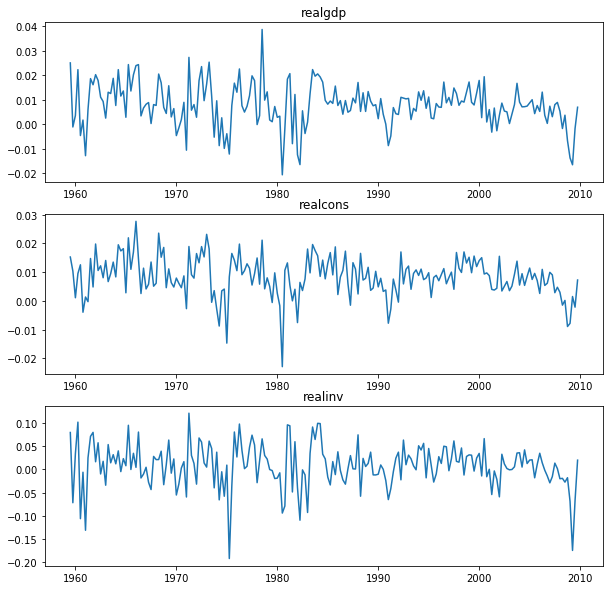

In [92]:

results.plot()

plt.show()


In [93]:
lag_order = results.k_ar

results.forecast(data.values[-lag_order:], 5)


array([[ 0.00502587,  0.0053712 ,  0.0051154 ],
       [ 0.00593683,  0.00784779, -0.00302473],
       [ 0.00662889,  0.00764349,  0.00393308],
       [ 0.00731516,  0.00797044,  0.00657495],
       [ 0.00732726,  0.00808811,  0.00649793]])

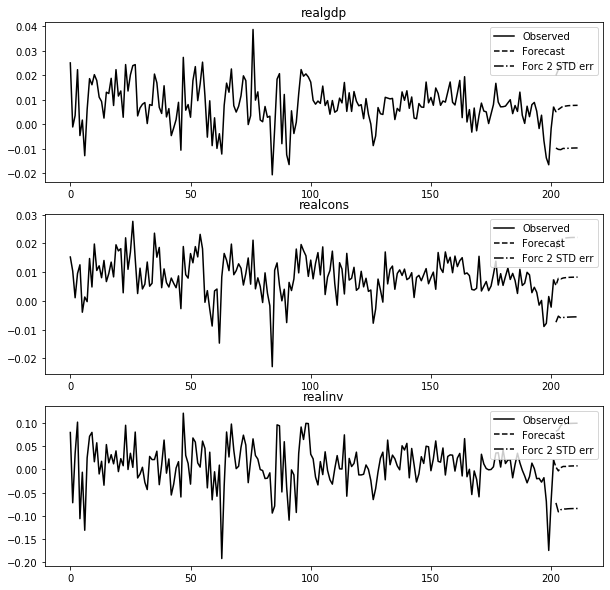

In [94]:

results.plot_forecast(10)

plt.show()


In [2]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline
artificial_intelligence = wikipedia.page("Artificial Intelligence").content


artificial_intelligence = sent_tokenize(artificial_intelligence)

import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text
sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)
print(ft_model.wv['truth'],type(ft_model.wv['truth']))

[nltk_data] Downloading package punkt to /home/halfmirror/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/halfmirror/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/halfmirror/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


artificial intelligence advanced technology present
[-3.54941376e-03  1.57482259e-03  5.44389384e-03  1.70129759e-03
 -3.20379295e-05 -5.48116351e-03  2.18853913e-03 -2.11525956e-04
 -1.52545588e-04 -5.42262569e-06  3.82440959e-07 -1.97851495e-03
 -3.54599813e-03  7.81443523e-05  2.84698093e-03 -7.68461847e-04
  2.46489304e-03  4.59966250e-04 -3.50328418e-03 -1.61663978e-03
  2.71169143e-03  2.91759090e-04  1.64708670e-03  2.33875262e-03
  4.56658518e-03  1.55395269e-03 -2.16021086e-03 -7.29247415e-03
  4.66674013e-04 -4.47251974e-03 -3.16416984e-03  1.56059768e-03
  3.47441318e-03 -5.48560289e-04  4.84802946e-03  8.22058297e-04
 -1.68673694e-04  3.86030599e-03  2.26443561e-04 -1.23481068e-05
 -5.03243087e-03 -8.13394901e-04 -2.80973502e-03 -3.62138126e-05
  1.77892402e-03  1.17301475e-04 -9.59490135e-04  2.78077903e-03
 -1.54710957e-03  2.30469904e-03 -1.53169836e-04 -4.82859832e-05
  3.39355832e-03  2.11463403e-03 -7.00297474e-04  2.87429779e-03
  2.59455526e-03  3.90382484e-03  2.00

In [16]:
all_words = set()
for i in word_tokenized_corpus:
    for j in i:
        all_words.add(j)
len(all_words)

2181

In [18]:
fast_text_vec = {}
for i in all_words:
    fast_text_vec[i] = ft_model.wv['{}'.format(i)]
fast_text_vec


{'paper': array([ 0.37194172,  0.2970105 ,  0.3890753 ,  0.3905909 ,  0.02051623,
        -0.24097541,  0.07382397, -0.05268465, -0.06794984,  0.10960193,
        -0.00408059, -0.24911544, -0.13936685, -0.05049133,  0.16711113,
        -0.13803293, -0.13751575,  0.0637703 ,  0.29402176, -0.06288365,
        -0.11748012,  0.15015538, -0.03331725,  0.22415195,  0.25296143,
        -0.05178712, -0.00585882,  0.03636424,  0.11710545,  0.15135434,
        -0.09367901, -0.25984836, -0.01712485, -0.22469957,  0.13860449,
         0.02444722,  0.0261156 , -0.28837362,  0.04914237,  0.43945926,
        -0.07025778,  0.0707796 ,  0.49049398, -0.28081068, -0.00575959,
        -0.348845  ,  0.08760945,  0.00113561, -0.2748336 , -0.05929461,
         0.28879786, -0.0086435 ,  0.4487988 ,  0.06897294, -0.06662758,
         0.12889399, -0.07658017, -0.33315945, -0.15643437,  0.00899296],
       dtype=float32),
 '1961': array([ 0.03268301, -0.0314922 , -0.037786  , -0.0063083 , -0.002203  ,
        -0

In [24]:
id_to_word = {}
for i,j in enumerate(all_words):
    id_to_word[i+1]=j
id_to_word[0]='UNK'


In [9]:


import pyautogui
import time 

while True:
    pyautogui.press('f5')
    time.sleep(60) 



KeyboardInterrupt: 

In [ ]:
from flask import Flask
app = Flask(__name__)
@app.route("/")
def hello():
   return "Hello World!!!"
if __name__ == '__main__':
    app.run()